<a href="https://colab.research.google.com/github/Vineeth37/Deep_Learning/blob/main/ANN_Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1}).astype(int)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(y_train)

(455, 455)

In [ ]:
len(X_test),len(y_test)

(114, 114)

- `we can give the above data to any machine learning classification Algorithm like KNN, Logistic Regression , Naive Bayes   etc... -> but we can also give the same data to ANN Architecture also ....`


- `to Develop Deep learning ANN we have Many Libraries like `
      - `Tensorflow ***`
      - `Keras`
      - `Pytorch *****`
      - `Caffee`
      - `Maxnet `
      - `Theano `

since in the initial stage we are going to use tensoflow and develop the Entire Deep learning ANN for Above training data and also I am going to use test data for finding the Performance

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # dense -> hidden layer
from tensorflow.keras.activations import sigmoid,relu

In [ ]:
X.shape[1]

30

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Sequential() # Sequntial is used to build architectures and it is a class -> model is an object for that

model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu',input_dim = X.shape[1])) # HL1

model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu')) # HL2

model.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu')) # HL3

model.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu')) # HL4


model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid')) # output layer

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,665 (18.22 KB)

 Trainable params: 4,665 (18.22 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss = 'binary_crossentropy')

In [ ]:
# know I will give the data to the Above architeture

model.fit(X_train,y_train,epochs=50,batch_size=15,validation_split=0.2)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9258 - loss: 0.2066 - val_accuracy: 0.7912 - val_loss: 0.3378
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.2970 - val_accuracy: 0.9011 - val_loss: 0.2579
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.2734 - val_accuracy: 0.8132 - val_loss: 0.2802
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8854 - loss: 0.2418 - val_accuracy: 0.6923 - val_loss: 0.3766
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6573 - loss: 0.4012 - val_accuracy: 0.7473 - val_loss: 0.3423
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8396 - loss: 0.3218 - val_accuracy: 0.8132 - val_loss: 0.2920
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8657 - loss: 0.2458 - val_accuracy: 0.8791 - val_loss: 0.3143
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9306 - loss: 0.2409 - val_accuracy: 0.6923 - val_loss

In [ ]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
model.history.history['accuracy']

[0.9093406796455383,
 0.8159340620040894,
 0.8379120826721191,
 0.8708791136741638,
 0.6840659379959106,
 0.8791208863258362,
 0.8818681240081787,
 0.8818681240081787,
 0.6456043720245361,
 0.6483516693115234,
 0.9120879173278809,
 0.9120879173278809,
 0.9120879173278809,
 0.8736263513565063,
 0.9175823926925659,
 0.9093406796455383,
 0.9148351550102234,
 0.9093406796455383,
 0.8818681240081787,
 0.8983516693115234,
 0.9148351550102234,
 0.9313187003135681,
 0.8873626589775085,
 0.9175823926925659,
 0.9175823926925659,
 0.9203296899795532,
 0.8956043720245361,
 0.9148351550102234,
 0.901098906993866,
 0.9175823926925659,
 0.9120879173278809,
 0.9175823926925659,
 0.9230769276618958,
 0.9230769276618958,
 0.8956043720245361,
 0.9258241653442383,
 0.9148351550102234,
 0.9148351550102234,
 0.9203296899795532,
 0.9203296899795532,
 0.9175823926925659,
 0.9203296899795532,
 0.9258241653442383,
 0.9148351550102234,
 0.8846153616905212,
 0.9093406796455383,
 0.9258241653442383,
 0.92032968997

In [ ]:
model.history.history['loss']

[0.23530063033103943,
 0.2826208472251892,
 0.30558356642723083,
 0.2905607223510742,
 0.36931973695755005,
 0.3226553797721863,
 0.23723231256008148,
 0.3376815915107727,
 0.40408292412757874,
 0.382099449634552,
 0.3981638550758362,
 0.29866865277290344,
 0.2552999258041382,
 0.2902016043663025,
 0.23865680396556854,
 0.2421538233757019,
 0.2428571730852127,
 0.2650417685508728,
 0.2502744197845459,
 0.25041958689689636,
 0.22261279821395874,
 0.2274884283542633,
 0.24405820667743683,
 0.21852852404117584,
 0.2058003544807434,
 0.22379565238952637,
 0.23422232270240784,
 0.242555633187294,
 0.2161055952310562,
 0.20266157388687134,
 0.3248230218887329,
 0.2325780838727951,
 0.2143949717283249,
 0.2109421342611313,
 0.2077845335006714,
 0.21547845005989075,
 0.2127002626657486,
 0.22730708122253418,
 0.21688836812973022,
 0.25869858264923096,
 0.2403450906276703,
 0.19954553246498108,
 0.19420096278190613,
 0.21798557043075562,
 0.4175918400287628,
 0.3561677932739258,
 0.279530882835

In [ ]:
model.history.history['val_accuracy']

[0.791208803653717,
 0.901098906993866,
 0.8131868243217468,
 0.692307710647583,
 0.7472527623176575,
 0.8131868243217468,
 0.8791208863258362,
 0.692307710647583,
 0.6483516693115234,
 0.901098906993866,
 0.8791208863258362,
 0.8791208863258362,
 0.8351648449897766,
 0.8791208863258362,
 0.901098906993866,
 0.9120879173278809,
 0.901098906993866,
 0.8901098966598511,
 0.9120879173278809,
 0.9120879173278809,
 0.9120879173278809,
 0.9120879173278809,
 0.901098906993866,
 0.901098906993866,
 0.901098906993866,
 0.9120879173278809,
 0.901098906993866,
 0.9120879173278809,
 0.901098906993866,
 0.9120879173278809,
 0.9120879173278809,
 0.901098906993866,
 0.9120879173278809,
 0.9120879173278809,
 0.9120879173278809,
 0.9120879173278809,
 0.9120879173278809,
 0.8681318759918213,
 0.901098906993866,
 0.9230769276618958,
 0.9120879173278809,
 0.9120879173278809,
 0.901098906993866,
 0.9120879173278809,
 0.901098906993866,
 0.901098906993866,
 0.9120879173278809,
 0.9120879173278809,
 0.857142

In [ ]:
model.history.history['val_loss']

[0.33777621388435364,
 0.2578642964363098,
 0.2802305817604065,
 0.3765968084335327,
 0.34230706095695496,
 0.29201599955558777,
 0.314304918050766,
 0.3552398979663849,
 0.3811114430427551,
 0.39087358117103577,
 0.40314382314682007,
 0.3412706255912781,
 0.49185678362846375,
 0.36296284198760986,
 0.27037835121154785,
 0.2243967354297638,
 0.22977139055728912,
 0.2978184223175049,
 0.24251990020275116,
 0.2717229127883911,
 0.27166762948036194,
 0.21977147459983826,
 0.2283901572227478,
 0.28829747438430786,
 0.24093802273273468,
 0.2906808853149414,
 0.31738609075546265,
 0.2648189663887024,
 0.2249179184436798,
 0.27392181754112244,
 0.2890876531600952,
 0.2250497043132782,
 0.21028545498847961,
 0.24660934507846832,
 0.32032647728919983,
 0.27138805389404297,
 0.2573202848434448,
 0.2487747222185135,
 0.2503563463687897,
 0.24349628388881683,
 0.23377011716365814,
 0.25355279445648193,
 0.27353283762931824,
 0.2622412443161011,
 0.43491825461387634,
 0.31877776980400085,
 0.242155

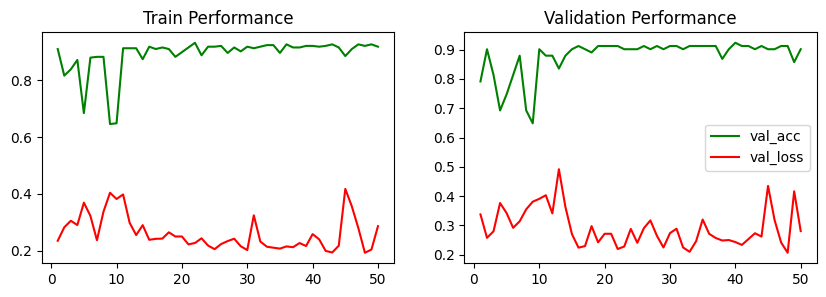

In [ ]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.title('Train Performance')
plt.plot(np.arange(1,51),model.history.history['accuracy'],color='g',label = 'train_acc')
plt.plot(np.arange(1,51),model.history.history['loss'],color='r',label = 'train_loss')

plt.subplot(1,2,2)
plt.title('Validation Performance')
plt.plot(np.arange(1,51),model.history.history['val_accuracy'],color='g',label = 'val_acc')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='r',label = 'val_loss')
plt.legend(loc=0)
plt.show()

**Test_data**

In [ ]:
# 114 rows are available for test_data
X_test.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875


In [ ]:
y_test.head(1)

,diagnosis
204,1


In [ ]:
d = []
for i in X_test.columns:
  d.append(X_test[i][204])
print(d)

[12.47, 18.6, 81.09, 481.9, 0.09965, 0.1058, 0.08005, 0.03821, 0.1925, 0.06373, 0.3961, 1.044, 2.497, 30.29, 0.006953, 0.01911, 0.02701, 0.01037, 0.01782, 0.003586, 14.97, 24.64, 96.05, 677.9, 0.1426, 0.2378, 0.2671, 0.1015, 0.3014, 0.0875]


In [ ]:
d=np.array(d).reshape(1,-1)
d.shape

(1, 30)

In [ ]:
# giving the data to the trained NN
if model.predict(d)[0][0] > 0.5:
  print(1)
else:
  print(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0


In [ ]:
y_test_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [ ]:
y_test_pred

array([[4.5959166e-01],
       [1.5025952e-19],
       [3.0234663e-04],
       [9.9968487e-01],
       [9.9874610e-01],
       [1.8832790e-06],
       [9.0762748e-18],
       [4.5959166e-01],
       [9.9410987e-01],
       [9.7054100e-01],
       [9.7247034e-01],
       [1.5253592e-02],
       [9.6946597e-01],
       [4.5959166e-01],
       [9.8875922e-01],
       [4.5959166e-01],
       [9.7355747e-01],
       [9.9946135e-01],
       [9.9496835e-01],
       [1.4073122e-06],
       [4.5959166e-01],
       [9.6531242e-01],
       [1.5275086e-14],
       [9.9607497e-01],
       [9.9803162e-01],
       [9.9469960e-01],
       [9.9649781e-01],
       [9.9931520e-01],
       [9.8945838e-01],
       [2.1969206e-21],
       [9.9843341e-01],
       [9.9371821e-01],
       [9.1939390e-01],
       [6.6949755e-01],
       [9.9821955e-01],
       [9.7514373e-01],
       [2.7105755e-01],
       [9.4378012e-01],
       [1.6752975e-09],
       [8.3981425e-01],
       [9.9644095e-01],
       [8.385970

In [ ]:
c = []
for i in y_test_pred:
  if i > 0.5:
    c.append(1)
  else:
    c.append(0)

In [ ]:
c

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,c)

array([[40,  3],
       [ 1, 70]])

In [ ]:
accuracy_score(y_test,c)

0.9649122807017544